### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=20
max_qubits=40
max_circuits=1
num_shots=1000

backend_id=None
provider_backend=None
exec_options=None

# An example using D-Wave Neal simulator
from neal import SimulatedAnnealingSampler
provider_backend = SimulatedAnnealingSampler()
backend_id="pegasus"

# # An example using D-Wave provider
# # Be sure to set the DWAVE_API_TOKEN environment variable
# from dwave.system.samplers import DWaveSampler
# from dwave.system import DWaveSampler
# provider_backend = DWaveSampler()
# backend_id="dwave_qpu"


### Maxcut - Method 1

In [2]:
# import sys
# sys.path.insert(1, "maxcut/qiskit")
# import maxcut_benchmark

# # set noise to None for testing
# import execute
# execute.set_noise_model(None)

# maxcut_benchmark.run(
#     min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
#     method=1,
#     backend_id=backend_id, provider_backend=provider_backend,
#     exec_options=exec_options
# )

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

MaxCut Benchmark Program - Ocean
... execution starting at Nov 06, 2022 01:34:27 UTC
... using backend_id = pegasus
************
Executing [1] restarts for num_qubits = 20
************
Average Circuit Algorithmic Depth, ξ (xi) for the 20 qubit group = 20, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 20 qubit group = 30, 0.5, 12.0
Average Creation, Elapsed, Execution Time for the 20 qubit group = 0.001, 0.222, 0.222 secs
Average Hellinger, Normalized Fidelity for the 20 qubit group = 0.0, 0.0

************
Executing [1] restarts for num_qubits = 24
************
Average Circuit Algorithmic Depth, ξ (xi) for the 24 qubit group = 20, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 24 qubit group = 30, 0.5, 12.0
Average Creation, Elapsed, Execution Time for the 24 qubit group = 0.0, 0.269, 0.269 secs
Average Hellinger, Normalized Fidelity for the 24 qubit group = 0.0, 0.0

************
Executing [1] restarts for num_qubits = 40
************
Average Cir

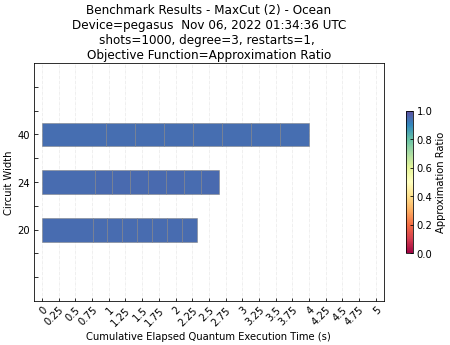

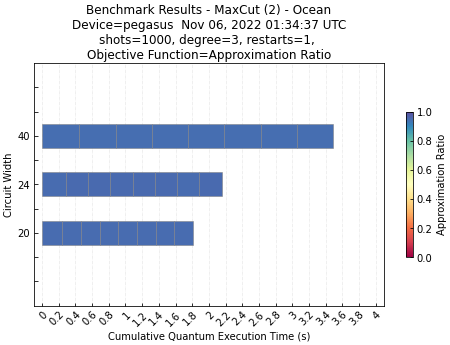

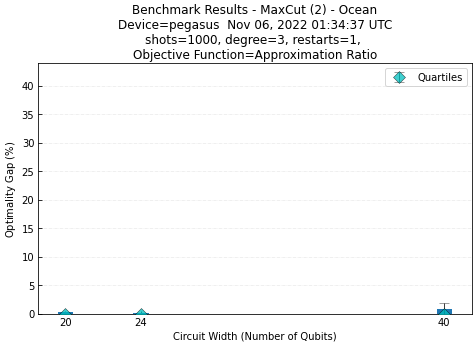

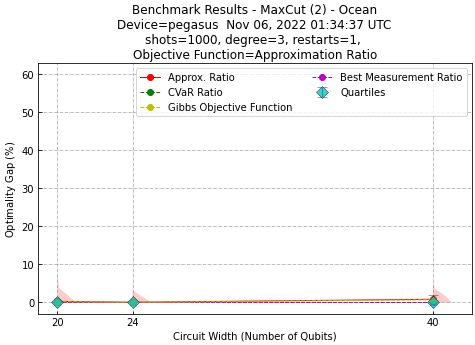

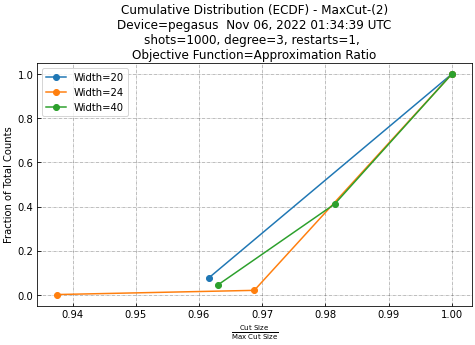

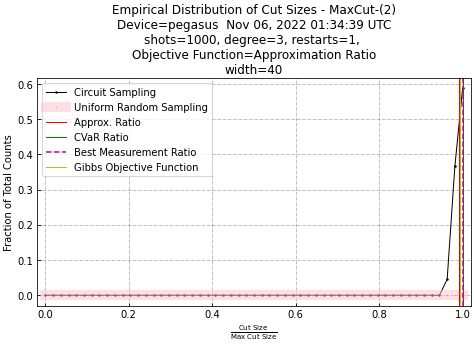

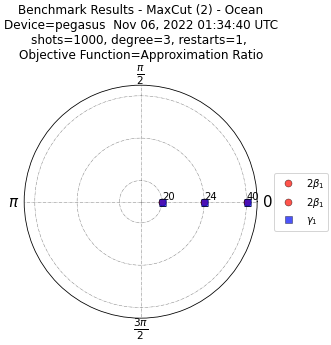

In [3]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# Debug/trace options
import execute
execute.verbose = False
execute.verbose_time = False
maxcut_benchmark.verbose = False

# Display options
score_metric=['approx_ratio']
#x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time' ]

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, degree=3, save_res_to_file=True,
    score_metric=score_metric, x_metric=x_metric, 
    backend_id=backend_id, provider_backend=provider_backend,
    exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.
Be sure to first execute the initial cell which sets the backend_id

... execution starting at Nov 06, 2022 01:34:41 UTC
Loading from width_24_restartInd_1.json, corresponding to 24 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 24 qubit group = 20, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 24 qubit group = 30, 0.5, 12.0
Average Creation, Elapsed, Execution Time for the 24 qubit group = 0.0, 0.269, 0.269 secs
Average Hellinger, Normalized Fidelity for the 24 qubit group = 0.0, 0.0

Loading from width_40_restartInd_1.json, corresponding to 40 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 40 qubit group = 20, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 40 qubit group = 30, 0.5, 12.0
Average Creation, Elapsed, Execution Time for the 40 qubit group = 0.0, 0.436, 0.436 secs
Average Hellinger, Normalized Fidelity for the 40 qubit group = 0.0, 0.0

Loading from width_20_restartInd_1.json, corresponding to 20 qubits and restart in

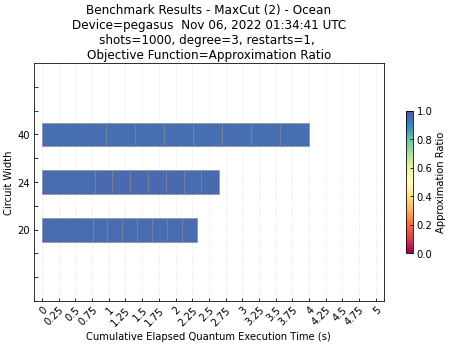

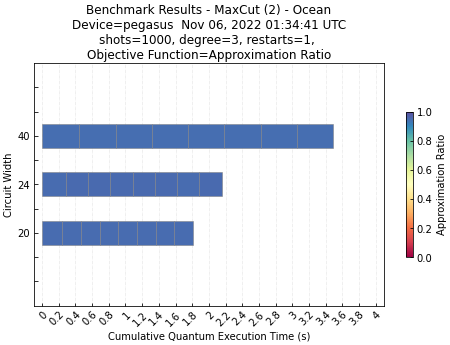

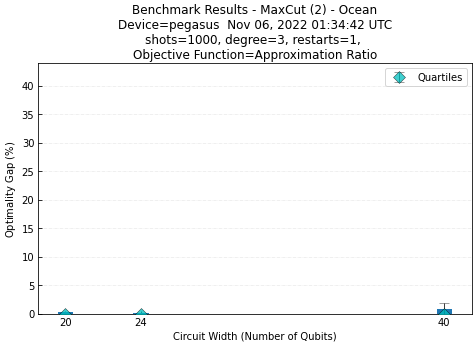

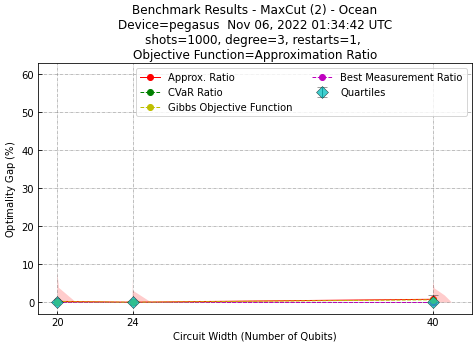

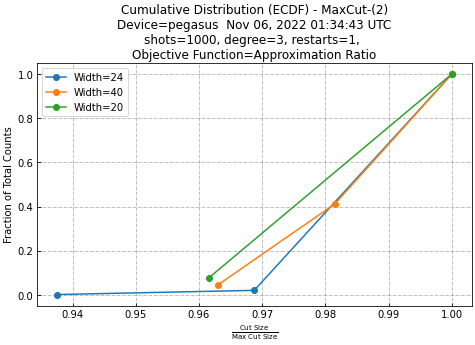

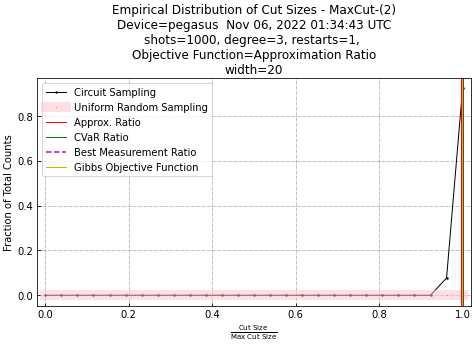

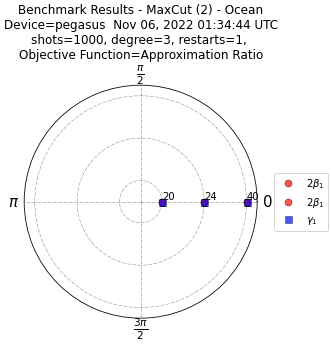

In [4]:
import os, maxcut_benchmark
maxcut_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time'])